In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.dpi'] = 70 #display 70 dpi in Jupyter Notebook, may consider100 dpi 
plt.rcParams['savefig.dpi'] = 70 #define 300 dpi for saving figures
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":70, 'savefig.dpi':70}) #defining dpi setting
sns.set_context('notebook')
sns.set_style("ticks")

In [2]:
dfes = pd.read_csv('../SVSM_SurfCity.csv')
dfes['BIN'] = np.where(dfes['NWI']=='wetland', 1, 0)
dfes['NWI'].value_counts()

wetland       27371
nonwetland     2698
Name: NWI, dtype: int64

In [3]:
# for some reason there's a weird thing where 20000 columns of null data are generated
# ok nvm it's cuz the excel file has a bunch of empty rows
dfes

,GRID_ID,NWI,dem_MIN,dem_MAX,dem_RANGE,dem_MEAN,dem_STD,dem_SUM,dem_MEDIAN,demS_MIN,...,NDRE_SUM,NDRE_MEDIAN,NDWI_MIN,NDWI_MAX,NDWI_RANGE,NDWI_MEAN,NDWI_STD,NDWI_SUM,NDWI_MEDIAN,BIN
0,AA-100,wetland,1.493541,1.955493,0.461952,1.792245,0.102500,172.055543,1.811748,1.574986,...,97.625904,0.146679,0.070826,0.200282,0.129456,0.147249,0.019188,97.625904,0.146679,1
1,AA-101,wetland,1.793308,2.000039,0.206731,1.881790,0.031989,193.824321,1.882854,1.733616,...,99.287870,0.153061,0.099037,0.208831,0.109794,0.153459,0.016545,99.287870,0.153061,1
2,AA-102,wetland,1.826029,2.159196,0.333167,1.902186,0.052551,194.022975,1.885938,1.786432,...,97.028358,0.146242,0.095568,0.190611,0.095043,0.146127,0.016328,97.028358,0.146242,1
3,AA-103,wetland,1.799260,1.984073,0.184813,1.865700,0.029773,192.167109,1.862764,1.760622,...,94.724609,0.146900,0.096352,0.194388,0.098036,0.146406,0.014958,94.724609,0.146900,1
4,AA-104,wetland,1.779996,1.919027,0.139031,1.845594,0.032779,188.250590,1.845443,1.747722,...,87.877235,0.133090,0.077379,0.175408,0.098028,0.132745,0.016691,87.877235,0.133090,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30064,Z-95,wetland,1.577974,1.832777,0.254803,1.748172,0.052526,181.809901,1.756294,1.652627,...,105.789961,0.158787,0.099838,0.244716,0.144878,0.160045,0.019199,105.789961,0.158787,1
30065,Z-96,wetland,1.643019,1.813549,0.170530,1.738646,0.042061,180.819235,1.744999,1.647199,...,94.439379,0.146637,0.083797,0.209457,0.125660,0.146191,0.019606,94.439379,0.146637,1
30066,Z-97,wetland,1.670815,1.876041,0.205226,1.757889,0.043780,179.304688,1.759013,1.654880,...,96.498969,0.145386,0.075544,0.214430,0.138886,0.145549,0.020934,96.498969,0.145386,1
30067,Z-98,wetland,1.770075,2.137457,0.367382,1.932508,0.097355,183.588286,1.913676,1.762921,...,99.041400,0.153841,0.088288,0.222826,0.134538,0.153078,0.019323,99.041400,0.153841,1


In [4]:
#Identifier is MIN, MAX, MEAN, RANGE etc.
def create_heatmap(identifier, ax, title):
    cols = []
    for (columnName, columnData) in dfes.iteritems():
        if identifier in columnName:
            cols.append(columnName)
    dfes_temp = pd.DataFrame(dfes, columns=cols)
    corr = dfes_temp.corr()
    ax.set_title(title)
    sns.heatmap(corr, cmap="Blues", ax=ax, square=True)

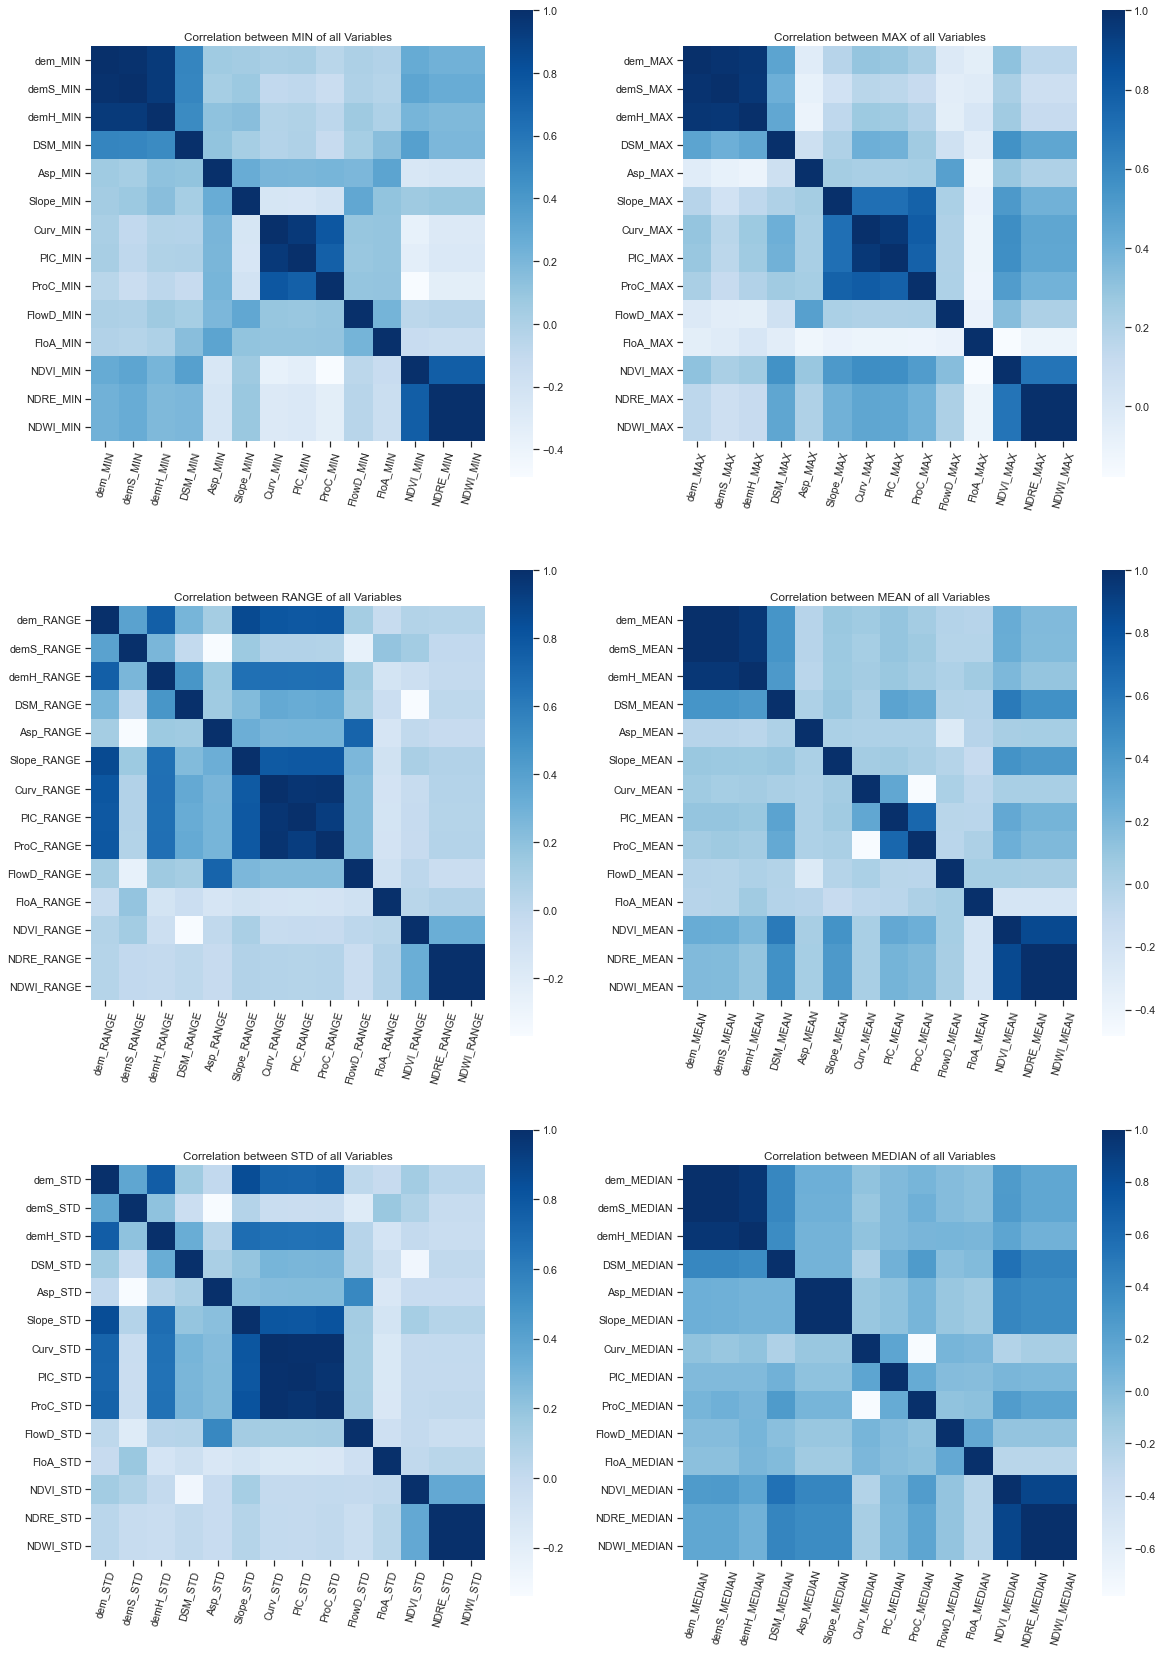

In [5]:
identifier_list = ["MIN", "MAX", "RANGE", "MEAN", "STD", "MEDIAN"]
fig,axn = plt.subplots(3, 2, figsize=(20,30))
i = 0
for ax in axn.flat:
    create_heatmap(identifier_list[i], ax, f"Correlation between {identifier_list[i]} of all Variables")
    ax.tick_params(axis='x', labelrotation=75)
    i+=1
fig.savefig('../Images/corr_heatmap.jpg')

In [6]:
corr = dfes.corr()
df_corr = pd.DataFrame(corr['BIN'])
df_corr = df_corr[:-1].sort_values(by=["BIN"])
pd.set_option('display.max_rows', None)
df_corr

,BIN
PlC_MIN,-0.189496
Curv_MIN,-0.187540
ProC_MIN,-0.182195
FloA_MEDIAN,-0.157241
FloA_MEAN,-0.140294
FloA_SUM,-0.139986
Asp_MIN,-0.131309
FloA_MIN,-0.115641
FloA_MAX,-0.114798
FloA_RANGE,-0.113030


In [7]:
df_corr.abs().sort_values(by=["BIN"])[::-1]

,BIN
PlC_STD,0.226169
Curv_STD,0.221866
ProC_STD,0.219009
Slope_MEAN,0.214117
Slope_SUM,0.213573
Asp_MEDIAN,0.209211
Slope_MEDIAN,0.209211
Slope_MAX,0.208251
Slope_RANGE,0.203159
PlC_RANGE,0.197732
